# MNIST Regularisierung

## Imports

In [16]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd

## Datensatz laden

In [1]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Datensatz visualisieren

Labels are [9 4 2 9 1 4 1 6 2 8 4 7 4 9 5 9 9 5 5 0 2 9 2 2 4]


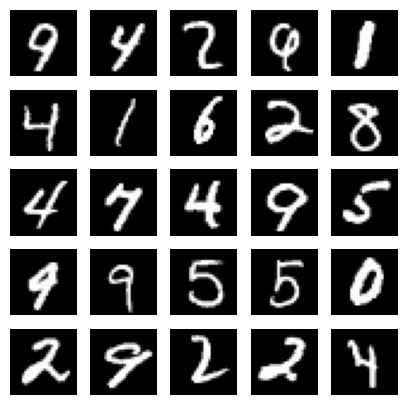

In [2]:
indices = np.random.randint(0, x_train.shape[0], size = 25)
images = x_train[indices]
labels = y_train[indices]

plt.figure(figsize=(5, 5))
print(f"Labels are {labels}")
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    label = labels[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

## Daten von 3D Tensor zu 2D Tensor umwandeln

In [3]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

## Farbwerte von 0 - 255 auf 0 - 1.0 normalisieren

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

## One-Hot Encoding

In [7]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Modell definieren

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/Users/yhutter/GitRepos/fhgr-dl/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

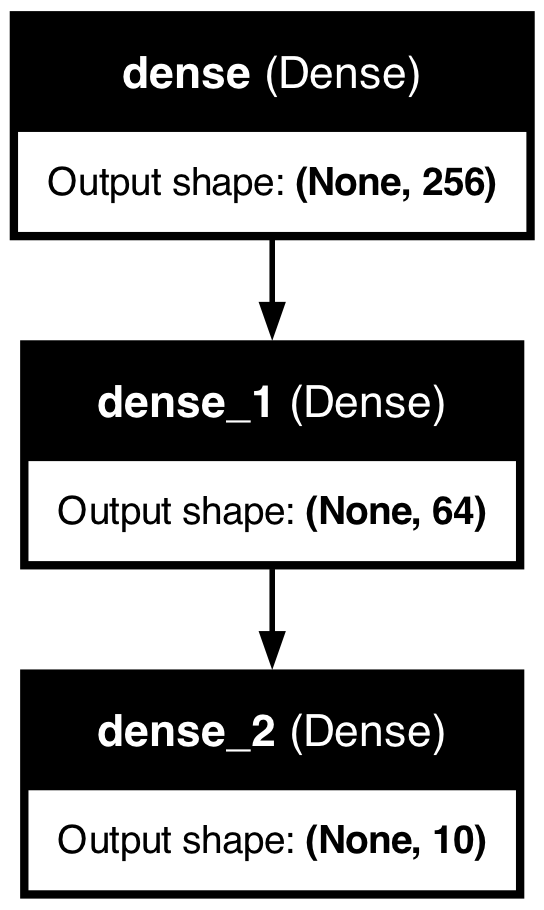

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## Modell kompilieren

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Modell trainieren

In [13]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.10)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8425 - loss: 0.5589 - val_accuracy: 0.9657 - val_loss: 0.1227
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9631 - loss: 0.1235 - val_accuracy: 0.9730 - val_loss: 0.0904
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9757 - loss: 0.0810 - val_accuracy: 0.9760 - val_loss: 0.0849
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9839 - loss: 0.0558 - val_accuracy: 0.9745 - val_loss: 0.0825
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9881 - loss: 0.0403 - val_accuracy: 0.9798 - val_loss: 0.0698
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9902 - loss: 0.0300 - val_accuracy: 0.9785 - val_loss: 0.0780
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9932 - loss: 0.0224 - val_accuracy: 0.9798 - val_loss: 0.0807
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9950 - loss: 0.0179 - val_accuracy: 0.

In [14]:
history.history['accuracy'][19]

0.9971296191215515

## Modell evaluieren

Modell Genauigkeit


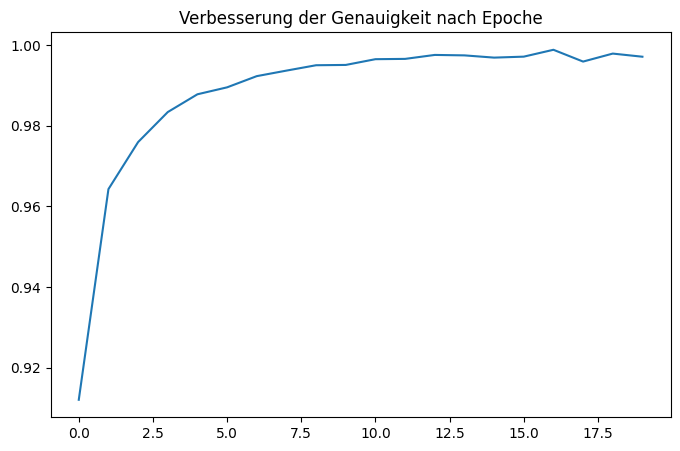

In [17]:
print("Modell Genauigkeit")
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8, 5))
plt.title("Verbesserung der Genauigkeit nach Epoche")
plt.show()

## Regularisierungsmethoden ausprobieren

[Link zu Regularisierung auf Medium](https://johnthas.medium.com/regularization-in-tensorflow-using-keras-api-48aba746ae21)

### L1 / L2 Regularisierung

- Kein grosser Wert für den L1 Regularisierer nehmen, ein Wert von bswp. 0.1 resultiert in einem sehr schlechten Ergebnis
- Allgemein bringt die L1/L2 nicht wirklich eine Verbesserung der Genauigkeit

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/Users/yhutter/GitRepos/fhgr-dl/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.10)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8382 - loss: 0.8933 - val_accuracy: 0.9605 - val_loss: 0.3442
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9554 - loss: 0.3381 - val_accuracy: 0.9668 - val_loss: 0.2672
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.2629 - val_accuracy: 0.9763 - val_loss: 0.2237
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.2235 - val_accuracy: 0.9737 - val_loss: 0.2059
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.2073 - val_accuracy: 0.9727 - val_loss: 0.2001
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.1864 - val_accuracy: 0.9762 - val_loss: 0.1874
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 0.1784 - val_accuracy: 0.9768 - val_loss: 0.1826
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.1717 - val_accuracy: 0.

Modell Genauigkeit


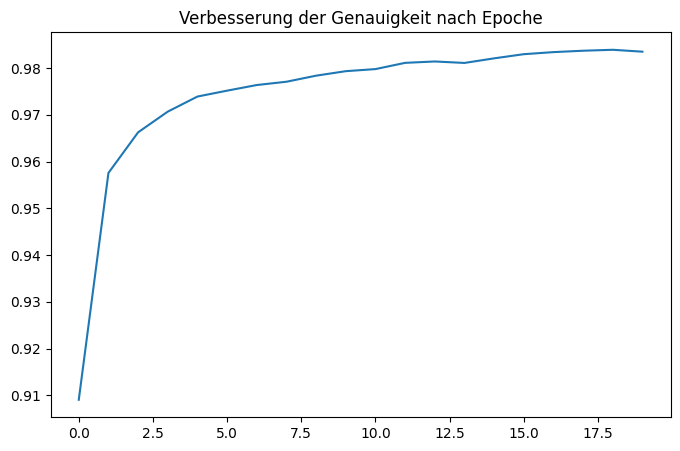

In [39]:
print("Modell Genauigkeit")
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8, 5))
plt.title("Verbesserung der Genauigkeit nach Epoche")
plt.show()

## Dropout

- 0.8 für Input Layer
- 0.5 für Hidden Layer

Das Hinzufügen von 0.5 für Hidden Layers verschlechtert die Genauigkeit. Allgemein sehe ich keine Verbesserung des Modells mittels Dropout.

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dropout(0.8, input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/Users/yhutter/GitRepos/fhgr-dl/venv/lib/python3.12/site-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.10)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3348 - loss: 1.9183 - val_accuracy: 0.8867 - val_loss: 0.5726
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6577 - loss: 1.0417 - val_accuracy: 0.9198 - val_loss: 0.4303
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7180 - loss: 0.8871 - val_accuracy: 0.9215 - val_loss: 0.3748
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7535 - loss: 0.7968 - val_accuracy: 0.9333 - val_loss: 0.3145
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7740 - loss: 0.7338 - val_accuracy: 0.9417 - val_loss: 0.2724
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7883 - loss: 0.6929 - val_accuracy: 0.9452 - val_loss: 0.2485
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7934 - loss: 0.6735 - val_accuracy: 0.9452 - val_loss: 0.2421
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8048 - loss: 0.6362 - val_accuracy: 0.

Modell Genauigkeit


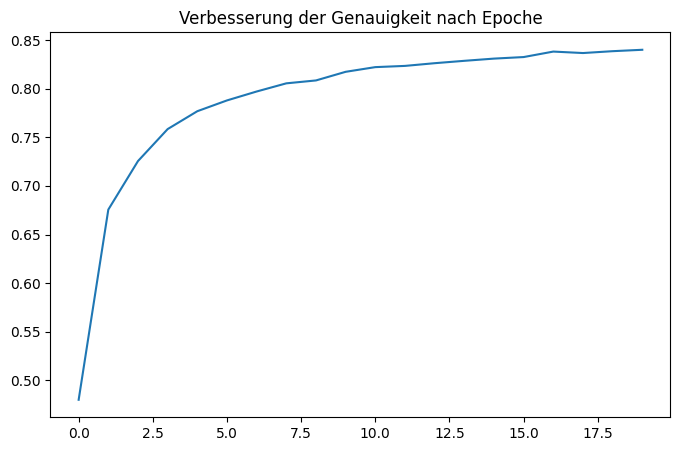

In [51]:
print("Modell Genauigkeit")
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8, 5))
plt.title("Verbesserung der Genauigkeit nach Epoche")
plt.show()

## Early Stopping

[Link Dokumentation Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

Early Stopping ist sieht für mich am sinnvollsten aus

In [52]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/Users/yhutter/GitRepos/fhgr-dl/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.10, callbacks=[callback])

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9848 - val_loss: 0.0998
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9997 - loss: 8.5327e-04 - val_accuracy: 0.9820 - val_loss: 0.1132
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9975 - loss: 0.0098 - val_accuracy: 0.9818 - val_loss: 0.1135
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9830 - val_loss: 0.1125
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9822 - val_loss: 0.1077
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.9817 - val_loss: 0.1079
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9852 - val_loss: 0.1039


Modell Genauigkeit


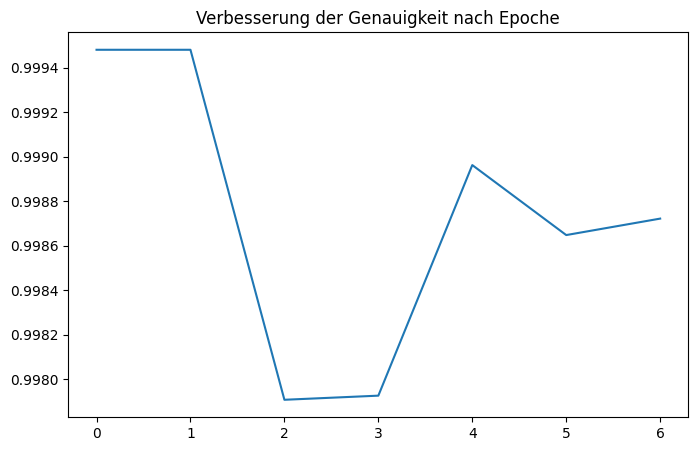

In [58]:
print("Modell Genauigkeit")
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8, 5))
plt.title("Verbesserung der Genauigkeit nach Epoche")
plt.show()